In [16]:
'Author: hernanda472@gmail.com'

import pandas as pd
import numpy as np

In [17]:
# Load dataset

df = pd.read_csv("1 Dataset.csv")
df

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,1700,1,1.9,0,0,1,54,0.5,170,...,17,644,913,2121,14,8,15,1,1,0
996,997,609,0,1.8,1,0,0,13,0.9,186,...,2,1152,1632,1933,8,1,19,0,1,1
997,998,1185,0,1.4,0,1,1,8,0.5,80,...,12,477,825,1223,5,0,14,1,0,0
998,999,1533,1,0.5,1,0,0,50,0.4,171,...,12,38,832,2509,15,11,6,0,1,0


**CLASSIFICATION**

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

In [19]:
x = df.iloc[:, 0:2]
x = pd.get_dummies(x)
x = x.values
x

array([[   1, 1043],
       [   2,  841],
       [   3, 1807],
       ...,
       [ 998, 1185],
       [ 999, 1533],
       [1000, 1270]], dtype=int64)

In [20]:
y = df.iloc[:, -1].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .25, random_state = 42)
KNN = KNeighborsClassifier(n_neighbors = 5, weights = 'uniform', algorithm = 'kd_tree', leaf_size = 30, p = 2, metric = 'minkowski', n_jobs = -1)
KNN.fit(x_train, y_train)

KNeighborsClassifier(algorithm='kd_tree', n_jobs=-1)

In [21]:
KNN.predict(x_test)

array([0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0], dtype=int64)

In [22]:
y_pred = KNN.predict(x_test)
print(classification_report(y_test.reshape(-1, 1), y_pred))

              precision    recall  f1-score   support

           0       0.45      0.48      0.46       117
           1       0.51      0.48      0.50       133

    accuracy                           0.48       250
   macro avg       0.48      0.48      0.48       250
weighted avg       0.48      0.48      0.48       250



In [23]:
print('Cross val', cross_val_score(KNN, y_test.reshape(-1, 1), y_pred, cv = 10))
print('Cross val', np.mean(cross_val_score(KNN, y_test.reshape(-1, 1), y_pred)))

Cross val [0.48 0.52 0.36 0.48 0.36 0.48 0.48 0.52 0.6  0.44]
Cross val 0.476


**CLUSTERING**

In [24]:
import seaborn as sns
from matplotlib import pyplot as plt
from yellowbrick.cluster import KElbowVisualizer
from matplotlib import colors
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

In [25]:
ds = df.copy()
cols_del = ["px_height","px_width", "int_memory"]
ds = ds.drop(cols_del, axis=1)
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds),columns= ds.columns )
pca = PCA(n_components=3)
pca.fit(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["px_height","px_width", "int_memory"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
px_height,1000.0,-1.421085e-17,1.309672,-2.623324,-1.073317,-0.121442,0.928770,3.827160
px_width,1000.0,-3.552714e-17,1.256744,-2.181569,-1.041138,-0.278712,0.989292,2.717076
int_memory,1000.0,3.552714e-18,1.235870,-2.799719,-0.913156,-0.133134,0.859552,3.599341


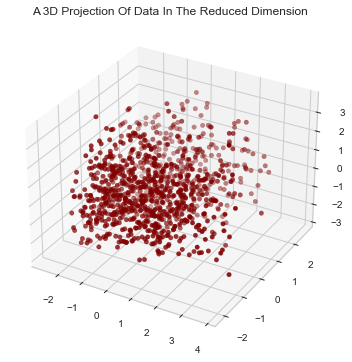

In [26]:
x =PCA_ds["px_height"]
y =PCA_ds["px_width"]
z =PCA_ds["int_memory"]
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

Elbow Method to determine the number of clusters to be formed:


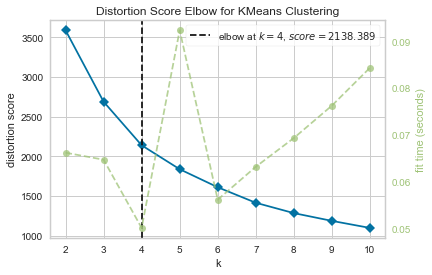

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [27]:
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

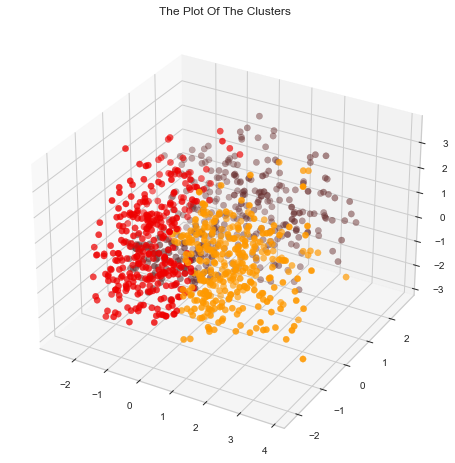

In [28]:
AC = AgglomerativeClustering(n_clusters=3)
yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_AC
df["Clusters"]= yhat_AC
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
pal = ["#682F2F","#EE0000", "#FF9900"]
ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters"], marker='o', cmap = colors.ListedColormap(pal))
ax.set_title("The Plot Of The Clusters")
plt.show()

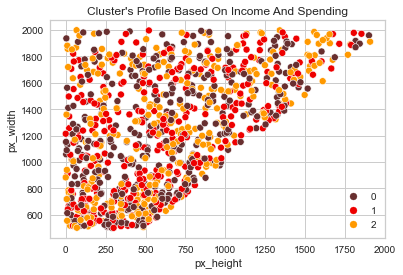

In [29]:
pl = sns.scatterplot(x = df["px_height"], y = df["px_width"], hue = df["Clusters"], palette = pal)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()